In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import seed
import pandas as pd


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
import keras_metrics as k
from keras import optimizers

from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("Insta Data/train1.csv")

features = dataset.iloc[:, 0:11].values
print(features.shape)

labels = dataset.iloc[:, 11].values
print(labels.shape)
#print(labels)

(576, 11)
(576,)


In [3]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state= 345, shuffle = True)
print(features_train.shape)

sc = MinMaxScaler()
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)

print(features_train)
print(features_test)

(460, 11)
[[1.00000000e+00 0.00000000e+00 1.66666667e-01 ... 1.32629585e-01
  4.47891448e-05 2.02266667e-01]
 [1.00000000e+00 0.00000000e+00 2.50000000e-01 ... 9.47354175e-04
  1.67551823e-05 4.61333333e-02]
 [0.00000000e+00 2.39130435e-01 8.33333333e-02 ... 0.00000000e+00
  3.25976309e-07 7.46666667e-03]
 ...
 [0.00000000e+00 1.63043478e-01 1.66666667e-01 ... 1.35336311e-04
  8.47538403e-07 2.93333333e-03]
 [1.00000000e+00 1.19565217e-01 3.33333333e-01 ... 2.16538097e-03
  4.81141032e-05 7.25333333e-02]
 [0.00000000e+00 5.43478261e-01 8.33333333e-02 ... 0.00000000e+00
  6.51952618e-07 2.66666667e-04]]
[[0.00000000e+00 3.58695652e-01 8.33333333e-02 ... 0.00000000e+00
  1.49949102e-06 5.33333333e-03]
 [1.00000000e+00 0.00000000e+00 8.33333333e-02 ... 1.00148870e-02
  8.93175086e-06 1.28000000e-02]
 [1.00000000e+00 0.00000000e+00 1.66666667e-01 ... 4.33076194e-03
  2.47741995e-04 3.70666667e-02]
 ...
 [1.00000000e+00 0.00000000e+00 1.66666667e-01 ... 1.08269049e-03
  4.89616416e-05 1.630

In [4]:
classifier = Sequential()
classifier.add(Dense(output_dim=10, 
                     activation='relu', 
                     input_dim=11))

classifier.add(Dense(output_dim=50, 
                     activation='relu'))

classifier.add(Dense(output_dim=1, 
                     activation='sigmoid'))

adam = optimizers.Adam(lr=0.02, beta_1=0.9, beta_2=0.999, amsgrad=False)


classifier.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])

print(classifier.summary())
plot_model(classifier, to_file='Classifier1_model_plot.png', show_shapes=True, show_layer_names=True)

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=10)`
  after removing the cwd from sys.path.
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
  import sys
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
history = classifier.fit(features_train, labels_train, validation_data=(features_test,labels_test),batch_size=16, epochs=50)




Train on 460 samples, validate on 116 samples
Epoch 1/50





460/460 [==============================] - 10s 22ms/step - loss: 0.6908 - acc: 0.6565 - val_loss: 0.6668 - val_acc: 0.7672
Epoch 2/50
460/460 [==============================] - 0s 454us/step - loss: 0.6372 - acc: 0.7870 - val_loss: 0.6196 - val_acc: 0.7672
Epoch 3/50
460/460 [==============================] - 0s 452us/step - loss: 0.5802 - acc: 0.8065 - val_loss: 0.5722 - val_acc: 0.7672
Epoch 4/50
460/460 [==============================] - 0s 454us/step - loss: 0.5127 - acc: 0.8196 - val_loss: 0.5150 - val_acc: 0.7931
Epoch 5/50
460/460 [==============================] - 0s 645us/step - loss: 0.4364 - acc: 0.8739 - val_loss: 0.4661 - val_acc: 0.8276
Epoch 6/50
460/460 [==============================] - 0s 763us/step - loss: 0.3662 - acc: 0.8848 - val_loss: 0.4264 - val_acc: 0.8621
Epoch 7/50
460/460 [==============================] - 0s 760us/step - loss: 0.3165 - acc: 0.9022 - val_loss: 0.4020 - val_acc: 0.8621
Epoch 8/

460/460 [==============================] - 0s 742us/step - loss: 0.1985 - acc: 0.9130 - val_loss: 0.3025 - val_acc: 0.9052
Epoch 50/50
460/460 [==============================] - 0s 759us/step - loss: 0.1967 - acc: 0.9152 - val_loss: 0.3012 - val_acc: 0.9052


In [6]:
validation_set = pd.read_csv("Insta Data/test.csv")

validation_features = validation_set.iloc[:, 0:11].values
print(validation_features.shape)

validation_labels = validation_set.iloc[:, 11].values
print(validation_labels.shape)

(120, 11)
(120,)


In [7]:
validation_features = sc.fit_transform(validation_features)
print(validation_features)
pred = classifier.predict(validation_features)
pred = (pred > 0.5).astype(int)


[[1.00000000e+00 3.70786517e-01 1.11111111e-01 ... 1.86269292e-02
  1.21337437e-04 8.09178744e-02]
 [1.00000000e+00 0.00000000e+00 5.55555556e-01 ... 1.59659393e-03
  8.70248011e-06 6.70960816e-04]
 [1.00000000e+00 0.00000000e+00 2.22222222e-01 ... 1.69771155e-01
  8.15546707e-05 8.95061728e-02]
 ...
 [1.00000000e+00 0.00000000e+00 2.22222222e-01 ... 1.59659393e-03
  2.07119027e-04 4.79200215e-01]
 [0.00000000e+00 1.91011236e-01 1.11111111e-01 ... 5.32197978e-04
  5.44526612e-05 2.27321524e-01]
 [1.00000000e+00 4.94382022e-01 1.11111111e-01 ... 1.59659393e-03
  9.69704926e-06 8.99087493e-03]]


In [8]:
print(classification_report(validation_labels, pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        60
           1       0.91      0.87      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



In [9]:
print(confusion_matrix(validation_labels, pred))

[[55  5]
 [ 8 52]]


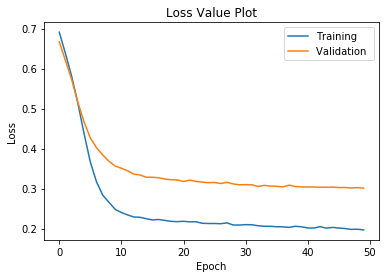

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Value Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation '], loc='upper right')
plt.savefig("Loss Plot.png")
plt.show()


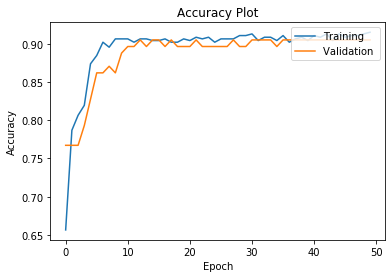

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation '], loc='upper right')
plt.savefig("Accuracy Plot.png")
plt.show()
